# Diabates Cormobidity



In this project, we analyze different parameters or factors that contribute to the diabetes condition, these factors are collected and sampled from different EHR datasets which include structured and unstructured datasets, however, in this dataset, we focus on the structured dataset, we will do inferential stattistics in order to understand causality and correlation of different features in the dataset, we will also try to make different hypothesis to get real insights from the data, the features come lab results, social interactions, nutrition, BMI and many more.

we will also to predict based on the features given in this dataset, who will be susceptible to get diabetes(Prognosis), this may in return help individual who are at risk at developing the disease to adjust their lives in order to prevent the disease... Prevention is better!!!

### importing Dependencies

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as si
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, jaccard_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import log_loss
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
import sklearn.tree as tree

### importing the dataset

we import the dataset from Kaggle using the pandas Library

In [3]:
df=pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


we check how many rows and columns our datasets contain (this is important since it may determine the type of Machine Learning models you may want to use)

In [4]:
df.shape

(768, 9)

we have seven hundreds and sixty eight rows and 9 columns which are our features.

Let us check the names of the columns and their values

In [5]:
print('list of columns',df.columns)

list of columns Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


The following are the features of our datasets:

 Pregnancies: this indicates the number of pregnancies a patient (if a female) have already had.

Glucose: this number indicates the level of Glucose in the Blood of the patient

Blood Presssure: this indicates the pressure of circulating blood against the walls of blood vessels. 

Skin Thickness: this indicates how hard and soft is the skin of the patient, the harder, the high the likelihood of the occurence.

Insulin: it's an hormone produced in the pancreas, which regulates the amount of glucose in the blood and the lack of insulin causes a form of diabetes.

BMI:It's a tool that is used to measure the ratio of your height to your weight to estimate the amount of the body fat.

Diabetes Pedigree Function: is a measure of genetic influence that provides data on diabetes mellitus history in relatives and the genetic relationship of those relatives to the patient.

Age: it indicates the current age of the patient.

Outcome: it's the condition in which the person(patient) is, 0 indicates the person is not diabetic and 1 indicates otherwise.

let us check the types of the datasets


In [6]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

checking for the null values in the datasets

In [7]:
df.isnull().value_counts()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  BMI    DiabetesPedigreeFunction  Age    Outcome
False        False    False          False          False    False  False                     False  False      768
Name: count, dtype: int64

Lucky us, we have no null values in our datasets!

let us perform a descriptive analysis of statistics

In [8]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


this method illustrates different statistical inferences of our datasets and it helps us to understand the distributions of the dataset

## Stastical Analysis 

we will analyze different features if they correlate or if one causes the order (remember, correlation is not causality... ), so let's dive in...

does Glucose level correlate or contribute to the blood pressure in the blood?

H0: Glucose causes blood pressure (Null hypothesis)

H1: Glucose doesn't cause blood pressure (Alternative hypothesis)


In [9]:
si.stats.ttest_ind(df['Glucose'], df['BloodPressure'])

TtestResult(statistic=38.400483000199415, pvalue=1.219963234785519e-226, df=1534.0)

we have looked for the P-Value and the T-staistics( the distribution drwan from the sample), we have a P-Value that is greater than 0.05 and therefore, we fail to rejects our null hypothesis that Glucose doesn't cause BloodPressure.

<Axes: xlabel='Glucose', ylabel='BloodPressure'>

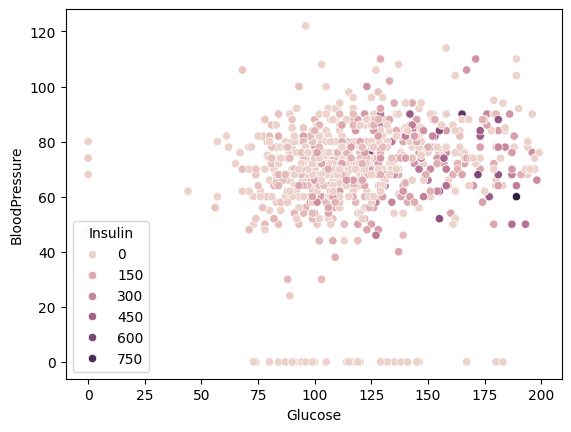

In [10]:
sns.scatterplot(x=df.Glucose, y=df.BloodPressure, hue=df['Insulin'],color='red')

let us use the another Scipy method to look for the correlation between BloodPressure and Glucose

In [11]:
si.stats.pearsonr(df['Glucose'],df['BloodPressure'])

PearsonRResult(statistic=0.15258958656866445, pvalue=2.169507153023399e-05)

we still with this method fail to reject the Null hypoyhesis and concludes that Glucose correlates to the Blood Pressure.

#### Let us use Regression model to infer correlation between Glucose and Blood pressure

In [12]:
x=df['Glucose']
y=df['BloodPressure']
X=sm.add_constant(x)
model=sm.OLS(y,X).fit()

prediction=model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          BloodPressure   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     18.26
Date:                Fri, 17 May 2024   Prob (F-statistic):           2.17e-05
Time:                        00:53:05   Log-Likelihood:                -3355.8
No. Observations:                 768   AIC:                             6716.
Df Residuals:                     766   BIC:                             6725.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         57.9377      2.703     21.433      0.000      52.631      63.244
Glucose        0.0924      0.022      4.273      0.000       0.050       0.135
==============================================================================
Omnibus:                      318.039   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1397.465
Skew:                          -1.903   Prob(JB):                    3.50e-304
Kurtosis:                       8.403   Cond. No.                         489.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Does Glucose Correlate with Insulin?

H0: Glucose Correlate with Insulin level

H1: Glucose doesn't cause Insulin level

In [13]:
si.stats.pearsonr(df['Glucose'],df['Insulin'])

PearsonRResult(statistic=0.3313571099202095, pvalue=3.8826239442717416e-21)

Here too, we fail to reject the Null hypothesis and this infers than Glucose level correlates with Insulin and this relationship is positive since the statistic coefficient is 0.33, meaning that the greater the level of Glucose in the Patient, the Greater the patient the level of Insulin shold be.

Visualizing the correlation using scatter plot

<Axes: xlabel='Glucose', ylabel='Insulin'>

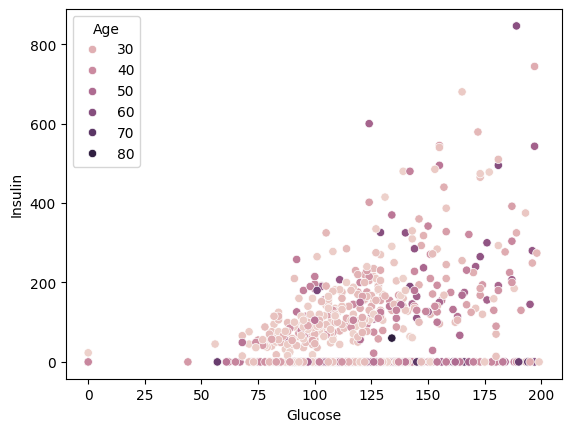

In [14]:
sns.scatterplot(x=df.Glucose, y=df.Insulin, hue=df['Age'],color='red')


### what is the probility of a patient to have at least a level of 250 of Insulin?

In [15]:
mean_Ins=round(df['Insulin'].mean(),3)
std_Ins=round(df['Insulin'].mean(),3)
Prob0=si.stats.norm.cdf((250-mean_Ins)/std_Ins)
print('probabilty a patient to have 250 level of insulin is:',1-Prob0)

probabilty a patient to have 250 level of insulin is: 0.016467641026816526


### Does Glucose correlate wih BMI ?

H0: Glucose correlates with BMI

H1: Glucose doesn't correlate with BMI

In [16]:
si.stats.pearsonr(df['Glucose'],df['BMI'])

PearsonRResult(statistic=0.22107106945898297, pvalue=5.8914125270842e-10)

<Axes: xlabel='Glucose', ylabel='BMI'>

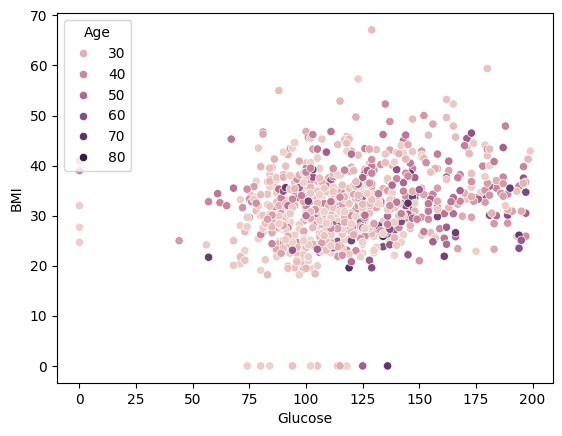

In [17]:
sns.scatterplot(x=df.Glucose, y=df.BMI, hue=df['Age'],color='red')

here too, we fail to reject the Null hypothesis and this infers than Glucose level correlates with Body Mass Index.

### what is the probabilty of a patient to have a Glucose of 50?

In [18]:
df['Glucose'].describe()
mean_Glucose= round(df['Glucose'].mean(),3)
std_Glucose=round(df['Glucose'].std(),3)
print('mean of Glucose:',mean_Glucose,'std Glucose:', std_Glucose)
Prob0=si.stats.norm.cdf((50-mean_Glucose)/std_Glucose)
print('Probablity of a patient to have a Glucose level of 50 is:', 1-Prob0)

mean of Glucose: 120.895 std Glucose: 31.973
Probablity of a patient to have a Glucose level of 50 is: 0.9867000541544959


the probabilty of a patient to have 50 as the level of Glucose in the blood is 50 which likely infers the normal level of Glucose.

### Does Blood Pressure differ by Age?

H0: Blood pressure doesn't differ by Age

H1: Blood pressure does refer by Age

In [19]:
f_statistic,P_value=si.stats.f_oneway(df['BloodPressure'],df['Age'])
print('F_statistics:{0},P_value:{1}'.format(f_statistic,P_value))

F_statistics:1925.8280000379411,P_value:3.2299259167867157e-273


we reject the null hypothesis that states that the Blood Pressure doesn't differ by Age since our P-Value is less than 0.05.

# Simple Visualization

we will use Exploratory data analysis through visualization in Tableau and we will create different dashboards

but now let's plot different distributions

array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

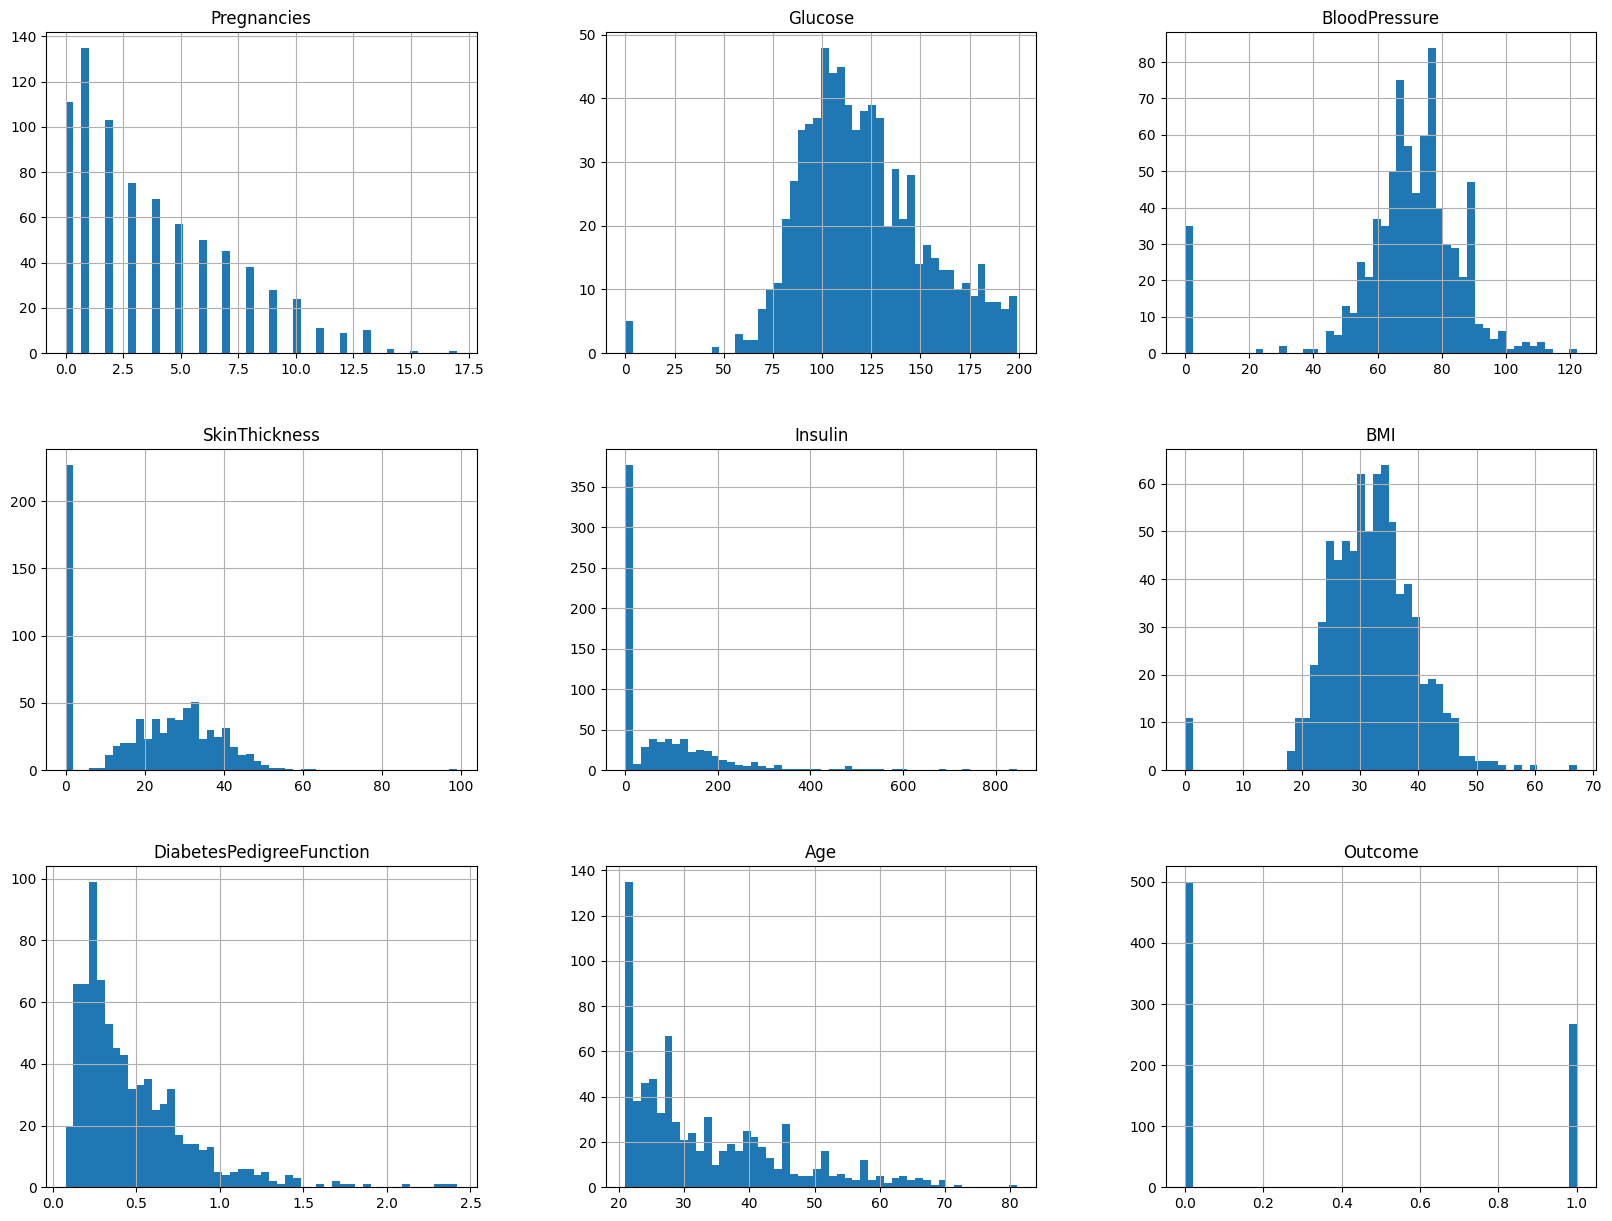

In [20]:
df.hist(bins=50,figsize=(20,15))

Checking Correlation between the Label and the features

In [21]:
corr_matrix = df.corr()
corr_matrix['Outcome'].sort_values(ascending=False)

Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64

we conclude that Glucose is a major factor that correlates(causes) the occurrence of the Diabetes.

Let us plot correlation using Heatmap

<Axes: >

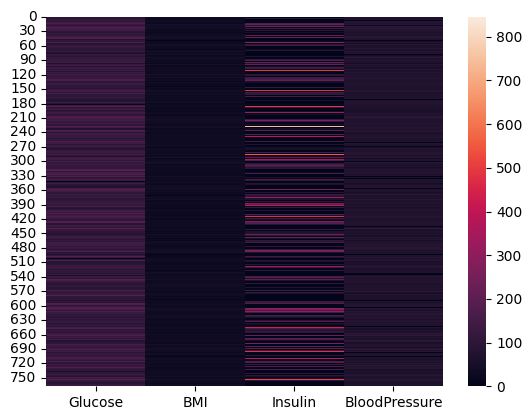

In [22]:
sns.heatmap(data=df[['Glucose','BMI','Insulin','BloodPressure']])

# Training the Model

we will use different models and fit our data into the model and see what model performs well

### Normalizing the data

we do normalize the data in order to fit the model, and since the first model we are using is a logistic Regression which gives a probability from 0 to 1, the metadata should in a float type of data.

In [23]:
x=df.drop(columns='Outcome') # we drop the label since this is a supervised machine learning model
y=df[['Outcome']] # this is the label we are trying to predict
X=StandardScaler().fit_transform(x.astype(float)) # this normalizes or standardizes the data into a float type of data.
X[:5]

array([[ 0.63994726,  0.84832379,  0.14964075,  0.90726993, -0.69289057,
         0.20401277,  0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575,  0.53090156, -0.69289057,
        -0.68442195, -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, -1.28821221, -0.69289057,
        -1.10325546,  0.60439732, -0.10558415],
       [-0.84488505, -0.99820778, -0.16054575,  0.15453319,  0.12330164,
        -0.49404308, -0.92076261, -1.04154944],
       [-1.14185152,  0.5040552 , -1.50468724,  0.90726993,  0.76583594,
         1.4097456 ,  5.4849091 , -0.0204964 ]])

### Train/Test split

we split the two sets of the data(X,y) into a train and test split

In [24]:
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.2, random_state=4)

we have splitted the data into a training and test sets and we have specified the test_set to be 20% of our data and set a randomization to select the data into a training and test set

## Logistic Regression

A logistic Regression is a supervised machine learning algorithm that uses Gradient descent function in order to classify numerical data into a probability  from 0 to 1.

We specify paameters for the model manually

In [25]:
parameters={'C':[0.01,0.1,1,10,100],'penalty':['12'],'solver':['lbfgs']}

we train the Logsitic Regression Model

In [26]:
LR=LogisticRegression(C=100, solver='lbfgs')
LR.fit(X_train,y_train)
y_hat=LR.predict(X_test)
# let us use the Grid Search method to select automatically the best hyperparameters for the model
LR_cv=GridSearchCV(Ridge(),[{'alpha':[0.01,0.1,1]}],cv=10) #we usually use hypaparameters tunning to deal directly with the proble of overfitting.
LR_cv.fit(X_train,y_train)

c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=10, estimator=Ridge(), param_grid=[{'alpha': [0.01, 0.1, 1]}])

We output the Hyperparameters

In [27]:
print("tuned hpyerparameters :(best parameters) ",LR_cv.best_params_)
print("accuracy :",LR_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'alpha': 1}
accuracy : 0.26666592928646793


This therefore allows us to tune in our model the best parameters, the best parameters for alpha is 1

# Evaluating the Model

### Cross Validation Score

In [28]:
cross_validation=cross_val_score(LR,X_train,y_train, cv=3, scoring='accuracy')
cross_validation

c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0.79512195, 0.76097561, 0.73529412])

### Jaccard Score

This method is used to calculate the accuracy of the prediction

In [29]:
Accuracy=jaccard_score(y_hat,y_test,pos_label=1)
print('Accuracy of the prediction is:', Accuracy)

Accuracy of the prediction is: 0.5384615384615384


Assessing the training model accuracy

In [30]:
score=LR.score(X_train,y_train)
print('Accuracy of the trainng model',score)

Accuracy of the trainng model 0.7736156351791531


Evaluating using Log Loss Metric

In [45]:
Loss=log_loss(y_test,y_hat)
Loss

7.021490919957888

##### We see that our training model trains the data accurately at 77% and predict the unseen data at 54%( which is pretty mediocre)

# Confusion Matrix

In [31]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['Not diabetic', 'Diabetic']); ax.yaxis.set_ticklabels(['Not Diabetic', 'Diabetic']) 
    plt.show() 

We use the best parameters to show the confusion matrix

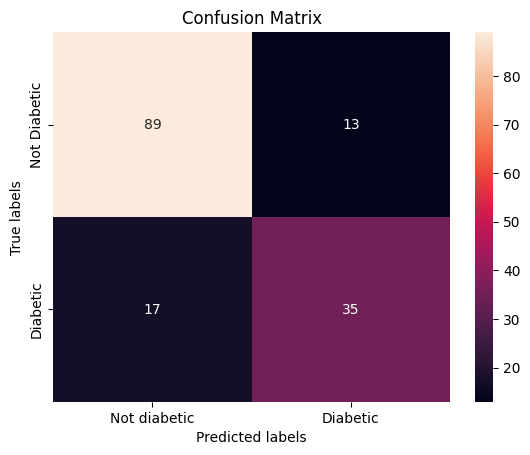

In [47]:
plot_confusion_matrix(y_test,y_hat)

The model predicts 89 patients from the test set(154 patient) as not diabetic and they are not diabetic (TN=True Negative)

The model also predicts 13 patients as not diabetic but they are diabetic (FP=False Positive) this is a type 2 error

The model also predicts 17 patients as as diabetic yet they are not diabetic (FN=False Negative) this is a type 2 error

The model aslo predicts 35 patients as diabetic and they are diabetic (TP=True Positive)

## Computation the different metrics Manually

 ### Precision=TP/(TP+FP)
 ### Recall=TP/(TP+FN)
 ### F-1 score=2*(Precision*Recall)/(Precision+Recall)

In [33]:
TP=35
FP=13
FN=17
TN=89
Precision=TP/(TP+FP)
Recall=TP/(TP+FN)
F_1_score=2*(Precision*Recall)/(Precision+Recall)
print('the accuracy of the model is:',F_1_score)

the accuracy of the model is: 0.7


# KNN

Our second model is KNN classifier, this is an algorithm that groups data together into different categories based different features that they do share togehter, this algoritm classes the points in different groups based on the distance that they are separated with, Eucladian distance or cosine distance.

In [34]:
k=4 # this dtermines the number of folds or groups we will classify the data
Neigh=KNeighborsClassifier(n_neighbors=k).fit(X_train,y_train) # fitting the model

c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [35]:
y1=Neigh.predict(X_test) # predicting the class
y1[:5]

array([1, 0, 0, 1, 0], dtype=int64)

### Evaluation of the classification

In [36]:
print(accuracy_score(y_train,Neigh.predict(X_train))) # checking the accuracy of the training model
print(accuracy_score(y_test,y1)) # testing the accuracy of the predictive model

0.8224755700325733
0.7402597402597403


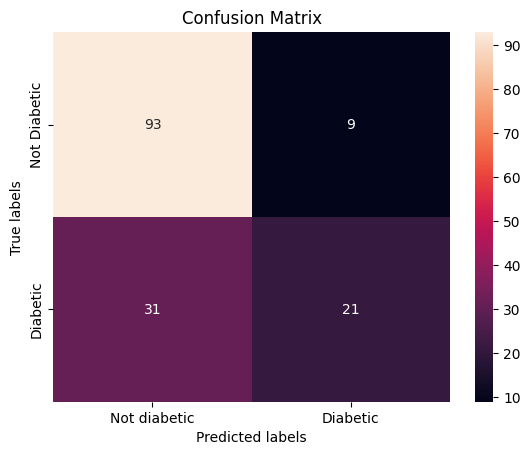

In [48]:
plot_confusion_matrix(y_test,y1)

In [51]:
TP=21
FP=9
FN=31
TN=93
Precision=TP/(TP+FP)
Recall=TP/(TP+FN)
F_1_score=2*(Precision*Recall)/(Precision+Recall)
print('the accuracy of the model is:',F_1_score)

the accuracy of the model is: 0.5121951219512195


#### calculating the accuracy of KNN for different values of K

In [37]:
Ks=10 # we define the number of neighbors as an iteration
mean_acc=np.zeros((Ks-1)) #we define a probable metrics of the mean
std_acc=np.zeros((Ks-1)) # we set also our standard deviation

In [38]:
for n in range(1,Ks):
    model=KNeighborsClassifier(n_neighbors=n).fit(X_train,y_train)
    y2=model.predict(X_test)
    mean_acc[n-1]=accuracy_score(y_test,y2)
    std_acc[n-1]=np.std(y_test)/np.sqrt(y2.shape[0])
mean_acc

c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\fromnumeric.py:3643: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)
C:\Users\USER\AppData\Local\Temp\ipykernel_11620\181133955.py:5: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  std_acc[n-1]=np.std(y_test)/np.sqrt(y2.shape[0])
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-pac

array([0.7012987 , 0.71428571, 0.74675325, 0.74025974, 0.74025974,
       0.72077922, 0.75974026, 0.75324675, 0.75324675])

Let us visualize the metrics using matplot

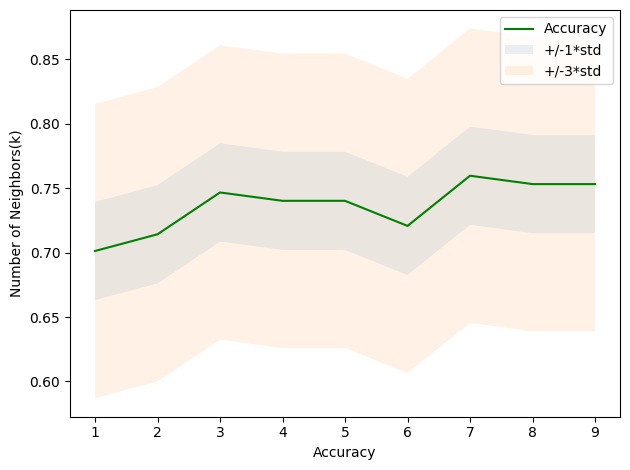

In [39]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc-1*std_acc,mean_acc+1*std_acc,alpha=0.1)
plt.fill_between(range(1,Ks),mean_acc-3*std_acc,mean_acc+3*std_acc,alpha=0.1)
plt.legend(("Accuracy",'+/-1*std','+/-3*std'))
plt.xlabel('Accuracy')
plt.ylabel('Number of Neighbors(k)')
plt.tight_layout()
plt.show()

In [40]:
print('The best Accuracy was',mean_acc.max(), 'with k=',mean_acc.argmax()+1)

The best Accuracy was 0.7597402597402597 with k= 7


Let us use a set of parameters and the GRID SEARCH algorithm to look for the best parameters


In [41]:
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],'p': [1,2]}
KNN_cv=GridSearchCV(Neigh,parameters,cv=10)
KNN_cv.fit(X,y)

c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:238: Data

GridSearchCV(cv=10, estimator=KNeighborsClassifier(n_neighbors=4),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2]})

chossing best hyperparameters to tune

In [42]:
print("tuned hpyerparameters :(best parameters) ",KNN_cv.best_params_)
print("accuracy :",KNN_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 9, 'p': 1}
accuracy : 0.7512816131237184


### Decision Tree Classifier

In [43]:
max_depths=6
Tree= DecisionTreeClassifier(criterion='entropy',max_depth=max_depths)
Tree.fit(X_train,y_train)
predic=Tree.predict(X_test)

### Evaluation

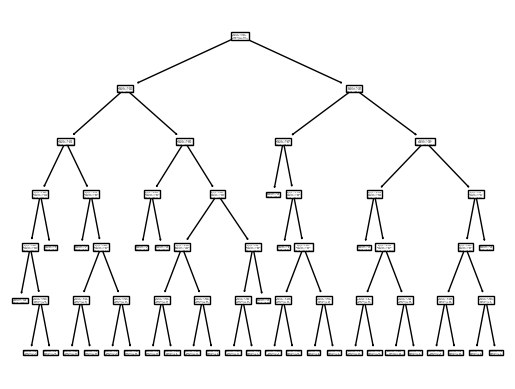

DecisionTree Accuracy: 0.8051948051948052


In [44]:
tree.plot_tree(Tree)
plt.show()
print('DecisionTree Accuracy:', accuracy_score(y_test, predic))

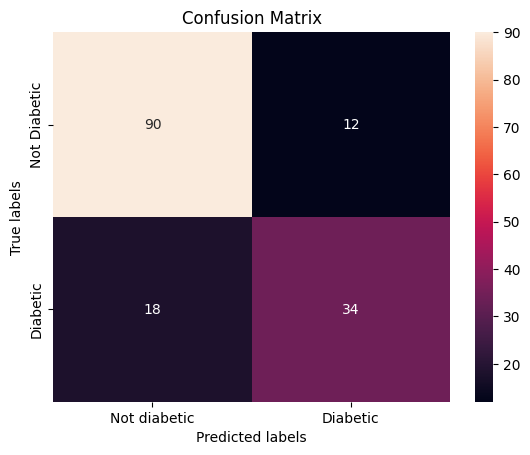

In [50]:
plot_confusion_matrix(y_test,predic)

In [52]:
TP=34
FP=12
FN=18
TN=90
Precision=TP/(TP+FP)
Recall=TP/(TP+FN)
F_1_score=2*(Precision*Recall)/(Precision+Recall)
print('the accuracy of the model is:',F_1_score)

the accuracy of the model is: 0.693877551020408


## Support Vector Machine

In [54]:
svm =SVC(kernel='rbf')
svm.fit(X_train,y_train)
y_t=svm.predict(X_test)

c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [55]:
print('accuracy score of SVM is:',accuracy_score(y_t,y_test))

accuracy score of SVM is: 0.7662337662337663


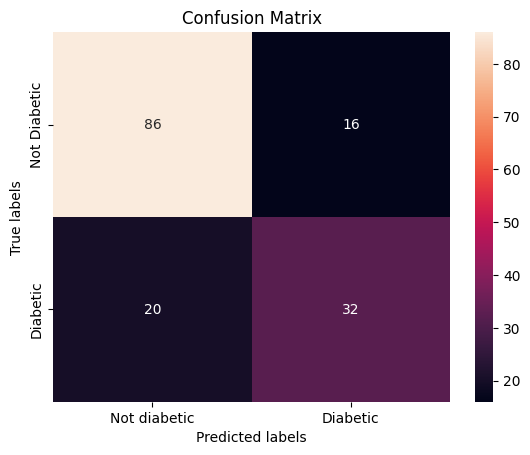

In [56]:
plot_confusion_matrix(y_test,y_t)

In [57]:
TP=32
FP=16
FN=20
TN=86
Precision=TP/(TP+FP)
Recall=TP/(TP+FN)
F_1_score=2*(Precision*Recall)/(Precision+Recall)
print('the accuracy of the model is:',F_1_score)

the accuracy of the model is: 0.64


# Random Forest Classifier

In [66]:
Random=RandomForestClassifier(random_state=10)
Random.fit(X_train,y_train)
y_pred=Random.predict(X_test)
print('accuracy of Random Forest is:',accuracy_score(y_test,y_pred))

c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


accuracy of Random Forest is: 0.7922077922077922


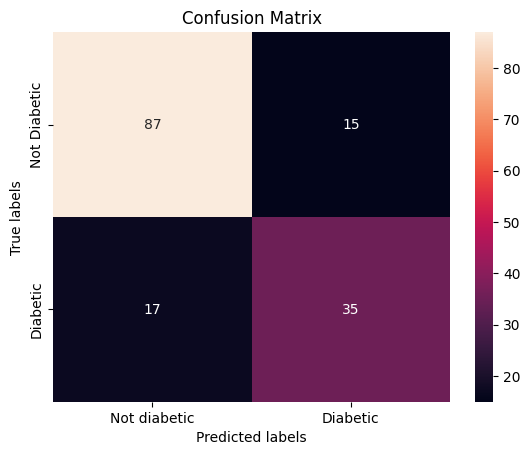

In [68]:
plot_confusion_matrix(y_test,y_pred)

In [69]:
TP=35
FP=15
FN=17
TN=87
Precision=TP/(TP+FP)
Recall=TP/(TP+FN)
F_1_score=2*(Precision*Recall)/(Precision+Recall)
print('the accuracy of the model is:',F_1_score)

the accuracy of the model is: 0.6862745098039216
